# Bus and train flux 2020

In [1]:
import pandas as pd
import numpy as np
import fiona
import geopandas as gpd 
from shapely.geometry import Polygon, LineString, Point

In [2]:
path='/Users/paw_paw/Library/Mobile Documents/com~apple~CloudDocs/学习/PC5287_M.SC Coursework Thesis for Physics And Technology/data set'

## Planning Area geometry

In [3]:
fiona.supported_drivers['KML'] = 'rw'

In [4]:
pa_plg = pa = gpd.read_file(path+'/master-plan-2019-planning-area-boundary-no-sea/planning-boundary-area.kml', driver='KML')
pa_plg = pa_plg.to_crs(3414)

def extract_desc_pa(desc_pa):
    return desc_pa.split('PLN_AREA_N')[1].split('<td>')[1].split('<')[0]

pa_plg['PLN_AREA_N'] = pa_plg.Description.apply(extract_desc_pa)
pa_plg.head()

,Name,Description,geometry,PLN_AREA_N
0,kml_1,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((26228.902 30746.172 0.000, 26280.4...",BUKIT MERAH
1,kml_2,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((21448.724 41356.741 0.000, 21508.5...",BUKIT PANJANG
2,kml_3,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((24031.387 36694.742 0.000, 24076.6...",BUKIT TIMAH
3,kml_4,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((24934.967 44017.724 0.000, 24953.6...",CENTRAL WATER CATCHMENT
4,kml_5,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((45094.369 42203.459 0.000, 45174.6...",CHANGI


Define the function to get Planning area name for each stops/MRT stations, which will be used later

In [5]:
pa_plg_geo = pa_plg.set_index(['PLN_AREA_N'])['geometry'].to_dict()

def get_PLA_AREA_N(coordinate):
    for key in pa_plg_geo:
        if coordinate.within(pa_plg_geo.get(key)):
            return key 

## Bus flux

In [6]:
# read the bus transpotation volume file 
bus_vol = pd.read_csv(path + '/origin_destination_bus_202006.csv')
bus_vol

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2020-06,WEEKENDS/HOLIDAY,10,BUS,65239,65159,1
1,2020-06,WEEKDAY,10,BUS,65239,65159,4
2,2020-06,WEEKDAY,7,BUS,23519,23311,3
3,2020-06,WEEKENDS/HOLIDAY,16,BUS,3151,11161,3
4,2020-06,WEEKDAY,16,BUS,3151,11161,3
...,...,...,...,...,...,...,...
4330411,2020-06,WEEKDAY,9,BUS,1113,70101,1
4330412,2020-06,WEEKENDS/HOLIDAY,9,BUS,1113,70101,1
4330413,2020-06,WEEKDAY,10,BUS,77009,5049,6
4330414,2020-06,WEEKENDS/HOLIDAY,10,BUS,77009,5049,5


In [7]:
'''read the bus stops' location data '''
bus_loc = pd.read_csv(path + '/BusStops_2020.03.28.csv')

In [8]:
'''transform the dataframe into GeoDataFrame format, 
and then transform the cordinate into SVY21
'''
bus_loc = gpd.GeoDataFrame(bus_loc, geometry=gpd.points_from_xy(bus_loc.Longitude,bus_loc.Latitude))
bus_loc = bus_loc.drop(columns=['Latitude', 'Longitude'])
bus_loc = bus_loc.set_crs(epsg=4326)
bus_loc = bus_loc.to_crs(3414)
bus_loc.head()

,RequestTimestamp,BusStopCode,RoadName,Description,geometry
0,2020.03.28.00.00.00,1012,Victoria St,Hotel Grand Pacific,POINT (30138.720 31024.418)
1,2020.03.28.00.00.00,1013,Victoria St,St. Joseph's Ch,POINT (30215.380 31119.673)
2,2020.03.28.00.00.00,1019,Victoria St,Bras Basah Cplx,POINT (30192.818 31040.038)
3,2020.03.28.00.00.00,1029,Nth Bridge Rd,Opp Natl Lib,POINT (30347.759 31005.039)
4,2020.03.28.00.00.00,1039,Nth Bridge Rd,Bugis Cube,POINT (30467.638 31174.757)


In [9]:
bus_loc['PLN_AREA_N'] = bus_loc.geometry.apply(get_PLA_AREA_N)

bus_loc

,RequestTimestamp,BusStopCode,RoadName,Description,geometry,PLN_AREA_N
0,2020.03.28.00.00.00,1012,Victoria St,Hotel Grand Pacific,POINT (30138.720 31024.418),ROCHOR
1,2020.03.28.00.00.00,1013,Victoria St,St. Joseph's Ch,POINT (30215.380 31119.673),ROCHOR
2,2020.03.28.00.00.00,1019,Victoria St,Bras Basah Cplx,POINT (30192.818 31040.038),DOWNTOWN CORE
3,2020.03.28.00.00.00,1029,Nth Bridge Rd,Opp Natl Lib,POINT (30347.759 31005.039),DOWNTOWN CORE
4,2020.03.28.00.00.00,1039,Nth Bridge Rd,Bugis Cube,POINT (30467.638 31174.757),DOWNTOWN CORE
...,...,...,...,...,...,...
5038,2020.03.28.00.00.00,99139,Changi Village Rd,Blk 5,POINT (45128.793 41125.617),CHANGI
5039,2020.03.28.00.00.00,99161,Nicoll Dr,Bef Changi Beach CP 3,POINT (45765.655 41354.202),CHANGI
5040,2020.03.28.00.00.00,99171,Nicoll Dr,Changi Beach CP 2,POINT (45550.279 41449.913),CHANGI
5041,2020.03.28.00.00.00,99181,Telok Paku Rd,Bef S'pore Aviation Ac,POINT (45270.050 41076.882),CHANGI


In [10]:
# transforn the postcode colume into the same datatype
bus_vol.ORIGIN_PT_CODE = bus_vol.ORIGIN_PT_CODE.astype('int64')
bus_vol.DESTINATION_PT_CODE = bus_vol.DESTINATION_PT_CODE.astype('int64')

In [11]:
# check the datatype
bus_vol.dtypes

YEAR_MONTH             object
DAY_TYPE               object
TIME_PER_HOUR           int64
PT_TYPE                object
ORIGIN_PT_CODE          int64
DESTINATION_PT_CODE     int64
TOTAL_TRIPS             int64
dtype: object

In [12]:
bus_loc.dtypes

RequestTimestamp      object
BusStopCode            int64
RoadName              object
Description           object
geometry            geometry
PLN_AREA_N            object
dtype: object

In [13]:
bus_loc.head()

,RequestTimestamp,BusStopCode,RoadName,Description,geometry,PLN_AREA_N
0,2020.03.28.00.00.00,1012,Victoria St,Hotel Grand Pacific,POINT (30138.720 31024.418),ROCHOR
1,2020.03.28.00.00.00,1013,Victoria St,St. Joseph's Ch,POINT (30215.380 31119.673),ROCHOR
2,2020.03.28.00.00.00,1019,Victoria St,Bras Basah Cplx,POINT (30192.818 31040.038),DOWNTOWN CORE
3,2020.03.28.00.00.00,1029,Nth Bridge Rd,Opp Natl Lib,POINT (30347.759 31005.039),DOWNTOWN CORE
4,2020.03.28.00.00.00,1039,Nth Bridge Rd,Bugis Cube,POINT (30467.638 31174.757),DOWNTOWN CORE


In [14]:
bus_vol_dict = bus_loc.set_index(['BusStopCode'])['PLN_AREA_N'].to_dict()

In [15]:
def bus_stop_loc(PT_CODE):
    return bus_vol_dict.get(PT_CODE)

bus_vol['ORIGIN_loc'] = bus_vol.ORIGIN_PT_CODE.apply(bus_stop_loc)

bus_vol['DESTINATION_loc'] = bus_vol.DESTINATION_PT_CODE.apply(bus_stop_loc)
bus_vol

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,ORIGIN_loc,DESTINATION_loc
0,2020-06,WEEKENDS/HOLIDAY,10,BUS,65239,65159,1,PUNGGOL,PUNGGOL
1,2020-06,WEEKDAY,10,BUS,65239,65159,4,PUNGGOL,PUNGGOL
2,2020-06,WEEKDAY,7,BUS,23519,23311,3,PIONEER,PIONEER
3,2020-06,WEEKENDS/HOLIDAY,16,BUS,3151,11161,3,DOWNTOWN CORE,QUEENSTOWN
4,2020-06,WEEKDAY,16,BUS,3151,11161,3,DOWNTOWN CORE,QUEENSTOWN
...,...,...,...,...,...,...,...,...,...
4330411,2020-06,WEEKDAY,9,BUS,1113,70101,1,DOWNTOWN CORE,TOA PAYOH
4330412,2020-06,WEEKENDS/HOLIDAY,9,BUS,1113,70101,1,DOWNTOWN CORE,TOA PAYOH
4330413,2020-06,WEEKDAY,10,BUS,77009,5049,6,PASIR RIS,OUTRAM
4330414,2020-06,WEEKENDS/HOLIDAY,10,BUS,77009,5049,5,PASIR RIS,OUTRAM


Now, I have linked all the bus volume data with its origin and desitination, then its time to deal with the train data. 

## Train flux

In [16]:
# read the MRT transpotation volume data 
train_vol = pd.read_csv(path + '/origin_destination_train_202006.csv')
train_vol

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2020-06,WEEKDAY,6,TRAIN,BP4,EW31,7
1,2020-06,WEEKDAY,12,TRAIN,NE15,SW5,47
2,2020-06,WEEKENDS/HOLIDAY,12,TRAIN,SW5,NE15,17
3,2020-06,WEEKENDS/HOLIDAY,12,TRAIN,NE15,SW5,26
4,2020-06,WEEKDAY,12,TRAIN,SW5,NE15,27
...,...,...,...,...,...,...,...
538992,2020-06,WEEKENDS/HOLIDAY,6,TRAIN,NE16/STC,NE1/CC29,171
538993,2020-06,WEEKDAY,6,TRAIN,NE1/CC29,NE16/STC,136
538994,2020-06,WEEKENDS/HOLIDAY,6,TRAIN,NE1/CC29,NE16/STC,37
538995,2020-06,WEEKENDS/HOLIDAY,18,TRAIN,EW19,DT17,1


In [17]:
train_loc = gpd.read_file(path + '/mrtsg_2020.csv')
train_loc['geometry']=gpd.points_from_xy(train_loc['X'],train_loc['Y'])
train_loc['PLN_AREA_N'] = train_loc.geometry.apply(get_PLA_AREA_N)

In [18]:
train_loc

,OBJECTID,STN_NAME,STN_NO,X,Y,Latitude,Longitude,COLOR,geometry,PLN_AREA_N
0,12,ADMIRALTY MRT STATION,NS10,24402.1063,46918.1131,1.440585001,103.8009982,RED,POINT (24402.106 46918.113),WOODLANDS
1,16,ALJUNIED MRT STATION,EW9,33518.6049,33190.0020,1.316432612,103.882893,GREEN,POINT (33518.605 33190.002),GEYLANG
2,33,ANG MO KIO MRT STATION,NS16,29807.2655,39105.7720,1.369933175,103.8495535,RED,POINT (29807.266 39105.772),ANG MO KIO
3,81,BAKAU LRT STATION,SE3,36026.0821,41113.8766,1.388092704,103.9054179,OTHERS,POINT (36026.082 41113.877),SENGKANG
4,80,BANGKIT LRT STATION,BP9,21248.2460,40220.9693,1.380017897,103.7726667,OTHERS,POINT (21248.246 40220.969),BUKIT PANJANG
...,...,...,...,...,...,...,...,...,...,...
184,175,WOODLANDS SOUTH MRT STATION,TE3,23607.8309,45444.7113,1.427259979,103.7938631,OTHERS,POINT (23607.831 45444.711),WOODLANDS
185,146,WOODLEIGH MRT STATION,NE11,32173.3186,35706.3794,1.339190046,103.8708081,PURPLE,POINT (32173.319 35706.379),TOA PAYOH
186,6,YEW TEE MRT STATION,NS5,18438.9791,42158.0124,1.397535018,103.7474307,RED,POINT (18438.979 42158.012),CHOA CHU KANG
187,41,YIO CHU KANG MRT STATION,NS15,29294.1283,40413.0820,1.381756046,103.8449439,RED,POINT (29294.128 40413.082),ANG MO KIO


Find what station names are 'nicknames': 

In [19]:
def newname():
    a = pd.concat([train_loc['STN_NO'],train_vol['ORIGIN_PT_CODE'],train_vol['ORIGIN_PT_CODE']])
    result = pd.DataFrame()
    result['STN_NO'] = a.drop_duplicates(keep=False)
    result=result.reset_index(drop=True)
    #result only contains the stations that's full No. is in loc.file but the vol.file
    
    def split(string):
        string = str(string)
        try:
            string.split('/')[1]
        except IndexError: 
            return [string],[None],[None]
        else:
            try:
                string.split('/')[2]
            except IndexError: 
                return string.split('/')[0].split(), string.split('/')[1].split() ,[None]
            else:        
                return string.split('/')[0].split(), string.split('/')[1].split(), string.split('/')[2].split()
    #This function is used to seperate the 'nicknames' of a station
    
    result['namelist']=result['STN_NO'].apply(split)
    
    def get_name1(namelist):
        return namelist[0][0]
    def get_name2(namelist):
        return namelist[1][0]
    def get_name3(namelist):
        return namelist[2][0]

    result['name1']=result['namelist'].apply(get_name1)
    result['name2']=result['namelist'].apply(get_name2)
    result['name3']=result['namelist'].apply(get_name3)

    result = result.drop(columns=['namelist'])
    
    list1=result.set_index(['name1'])['STN_NO'].to_dict() 
    list2=result.set_index(['name2'])['STN_NO'].to_dict() 
    list3=result.set_index(['name3'])['STN_NO'].to_dict()
    
    def get_name(name): 
        if name in list1.keys():
            get_name =list1.get(name)
        elif oldname in list2.keys():
            get_name =list2.get(name)
        elif oldname in list3.keys():
            get_name =list3.get(name)
        else: get_name=oldname 
        return get_name
      
    return list1,list2,list3

Use a easier function 

In [20]:
list1,list2,list3 = newname()

def get_name(oldname): 
    if oldname in list1.keys():
        get_name=list1.get(oldname)
    elif oldname in list2.keys():
        get_name =list2.get(oldname)
    elif oldname in list3.keys():
        get_name =list3.get(oldname)
    else: get_name=oldname 
    return get_name

test it

In [21]:
train_vol['ORIGIN_PT_CODE']=train_vol['ORIGIN_PT_CODE'].apply(get_name)

In [22]:
train_vol['DESTINATION_PT_CODE'] = train_vol['DESTINATION_PT_CODE'].apply(get_name)

In [23]:
train_vol.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2020-06,WEEKDAY,6,TRAIN,BP4,EW31,7
1,2020-06,WEEKDAY,12,TRAIN,NE15,SW5,47
2,2020-06,WEEKENDS/HOLIDAY,12,TRAIN,SW5,NE15,17
3,2020-06,WEEKENDS/HOLIDAY,12,TRAIN,NE15,SW5,26
4,2020-06,WEEKDAY,12,TRAIN,SW5,NE15,27


We can see all the short names are replaced by the full names. 

In [24]:
train_loc.head()

,OBJECTID,STN_NAME,STN_NO,X,Y,Latitude,Longitude,COLOR,geometry,PLN_AREA_N
0,12,ADMIRALTY MRT STATION,NS10,24402.1063,46918.1131,1.440585001,103.8009982,RED,POINT (24402.106 46918.113),WOODLANDS
1,16,ALJUNIED MRT STATION,EW9,33518.6049,33190.0020,1.316432612,103.882893,GREEN,POINT (33518.605 33190.002),GEYLANG
2,33,ANG MO KIO MRT STATION,NS16,29807.2655,39105.7720,1.369933175,103.8495535,RED,POINT (29807.266 39105.772),ANG MO KIO
3,81,BAKAU LRT STATION,SE3,36026.0821,41113.8766,1.388092704,103.9054179,OTHERS,POINT (36026.082 41113.877),SENGKANG
4,80,BANGKIT LRT STATION,BP9,21248.2460,40220.9693,1.380017897,103.7726667,OTHERS,POINT (21248.246 40220.969),BUKIT PANJANG


In [25]:
train_loc_dict = train_loc.set_index(['STN_NO'])['PLN_AREA_N'].to_dict()

def find_train_loc(PT_CODE):
    return train_loc_dict.get(PT_CODE)

train_vol['ORIGIN_loc'] = train_vol['ORIGIN_PT_CODE'].apply(find_train_loc)
train_vol['DESTINATION_loc'] = train_vol['DESTINATION_PT_CODE'].apply(find_train_loc)

In [26]:
train_vol

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,ORIGIN_loc,DESTINATION_loc
0,2020-06,WEEKDAY,6,TRAIN,BP4,EW31,7,CHOA CHU KANG,TUAS
1,2020-06,WEEKDAY,12,TRAIN,NE15,SW5,47,SENGKANG,SENGKANG
2,2020-06,WEEKENDS/HOLIDAY,12,TRAIN,SW5,NE15,17,SENGKANG,SENGKANG
3,2020-06,WEEKENDS/HOLIDAY,12,TRAIN,NE15,SW5,26,SENGKANG,SENGKANG
4,2020-06,WEEKDAY,12,TRAIN,SW5,NE15,27,SENGKANG,SENGKANG
...,...,...,...,...,...,...,...,...,...
538992,2020-06,WEEKENDS/HOLIDAY,6,TRAIN,NE16/STC,NE1/CC29,171,None,None
538993,2020-06,WEEKDAY,6,TRAIN,NE1/CC29,NE16/STC,136,None,None
538994,2020-06,WEEKENDS/HOLIDAY,6,TRAIN,NE1/CC29,NE16/STC,37,None,None
538995,2020-06,WEEKENDS/HOLIDAY,18,TRAIN,EW19,DT17,1,QUEENSTOWN,DOWNTOWN CORE


## Sum up the flux

In [27]:
#read KML file
fiona.supported_drivers['KML'] = 'rw'

In [28]:
pa = gpd.read_file(path+'/master-plan-2019-planning-area-boundary-no-sea/planning-boundary-area.kml', \
                            driver='KML')
pa = pa.to_crs(3414)

def extract_desc_pa(desc_pa):
    return desc_pa.split('PLN_AREA_N')[1].split('<td>')[1].split('<')[0]

pa['PLN_AREA_N'] = pa.Description.apply(extract_desc_pa)

In [29]:
flux_bus_ij = pd.DataFrame()

flux_bus_ij = bus_vol.groupby(['ORIGIN_loc','DESTINATION_loc']).sum(numeric_only=True)['TOTAL_TRIPS'].reset_index()

In [30]:
flux_MRT_ij = pd.DataFrame()

flux_MRT_ij = train_vol.groupby(['ORIGIN_loc','DESTINATION_loc']).sum(numeric_only=True)['TOTAL_TRIPS'].reset_index()

In [31]:
T_ij = pd.DataFrame(index=pa['PLN_AREA_N'],columns=pa['PLN_AREA_N'].values)

In [32]:
def bus_flux(x,y):
    pa1 = T_ij.index[x]
    pa2 = T_ij.index[y]
    
    try:
        return flux_bus_ij[(flux_bus_ij['ORIGIN_loc']==pa1)&\
                        (flux_bus_ij['DESTINATION_loc']==pa2)]['TOTAL_TRIPS'].values[0]
    except:
        return 0

bus = pd.DataFrame(np.zeros((55,55)))

for i in range(0,55):
    for j in range(0,55):
        bus[i][j]=bus_flux(i,j)

In [33]:
def MRT_flux(x,y):
    pa1 = T_ij.index[x]
    pa2 = T_ij.index[y]
    
    try:
        return flux_MRT_ij[(flux_MRT_ij['ORIGIN_loc']==pa1)&\
                        (flux_MRT_ij['DESTINATION_loc']==pa2)]['TOTAL_TRIPS'].values[0]
    except:
        return 0
    
MRT = pd.DataFrame(np.zeros((55,55)))

for i in range(0,55):
    for j in range(0,55):
        MRT[i][j]=MRT_flux(i,j)   

In [34]:
T_ij=bus+MRT

temp = pd.read_csv(path +'/distance_pa_to_pa.csv').drop(columns='Unnamed: 0').set_index(['PA_name'])

temp.mask(temp!=False, inplace=True)

T_ij.columns=temp.columns

T_ij.index=temp.index

T_i=T_ij.index.to_frame().drop(columns='PA_name')

T_i['TOTAL']=np.nansum(T_ij,axis=1)-np.diagonal(T_ij)

In [35]:
T_ij.to_csv(path+'/Total_flux_ij_2020.csv')
T_i.to_csv(path+'/Total_flux_2020.csv')

In [36]:
T_i=pd.read_csv(path+'/Total_flux_2020.csv')

<AxesSubplot: >

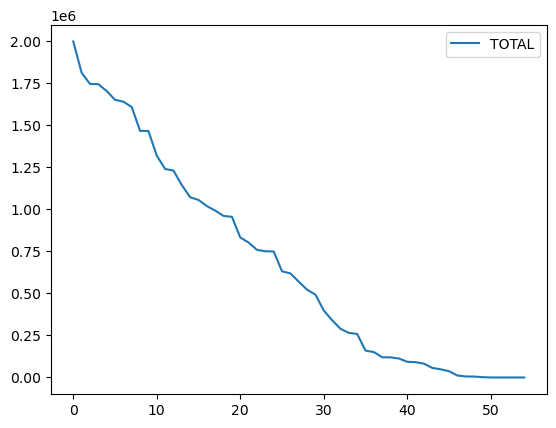

In [37]:
import matplotlib.pyplot as plt

T_i.sort_values(by='TOTAL',ascending=False,ignore_index=True).plot()